# Hospital Length of Stay

In order for hospitals to optimize resource allocation, it is important to predict accurately how long a newly admitted patient will stay in the hospital.

This notebook demostrate using multiple regression models from scikit-learn and train locally , utilizing Azure Machine Learning service to register and track the model performances



In [33]:
#!pip install --upgrade azureml-sdk[notebooks] 

Requirement already up-to-date: azureml-sdk[notebooks] in /home/nbuser/anaconda3_420/lib/python3.5/site-packages (0.1.65)
    100% |████████████████████████████████| 9.7MB 2.4MB/s eta 0:00:01


You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# WARNING.
# We recommend not using Internet Explorer as it does not support plotting, and may crash your session.


Time:  4.44999968749471e-05


In [1]:
# Load packages.
import os, sys
from numpy import mean
from math import sqrt
import pandas as pd
df1=pd.read_csv('LengthOfStay.csv')
df1cols=list(df1.columns)
print(df1cols, len(df1cols))
df1.head()

['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'discharged', 'facid', 'lengthofstay'] 28


,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [3]:
"""
df2=pd.read_csv('LengthOfStay_Prod.csv')
df2cols=list(df2.columns)
print(df2cols, len(df2cols))
df2.head()
"""

['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'discharged', 'facid'] 27


,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid
0,29000,04/26/12,0,F,0,0,1,0,0,0,...,134.150501,135.760839,26.0,1.125323,29.410090,84.046775,5.5,0,04/30/12,C
1,29001,01/17/12,0,F,0,0,0,0,0,0,...,132.951615,170.677225,16.0,1.221446,27.656177,85.141904,6.5,1,01/18/12,A
2,29002,02/11/12,0,F,0,0,0,0,0,0,...,135.126036,139.790366,12.0,0.937302,29.923813,44.658802,6.5,1,02/12/12,B
3,29003,10/02/12,0,M,1,0,0,0,0,0,...,137.990252,113.881485,25.0,1.178341,26.072578,75.119608,6.5,3,10/05/12,C
4,29004,07/10/12,0,F,0,0,0,0,0,1,...,134.282144,161.821043,7.0,0.758273,32.230980,70.926042,6.2,1,07/16/12,E


In [2]:
df3=pd.read_csv('MetaData_Facilities.csv')
df3.head()

,Capacity,Id,Name
0,30,C,General Medicine 3 South
1,95,E,Behavioral 1 East
2,75,A,General Medicine 3 West
3,80,B,Pulmonary 2 West
4,100,D,Geriatrics 2 East


In [3]:
df13=pd.merge(df1,df3,left_on='facid', right_on='Id')
df13.head()
del df13['Id']
df13.head()


,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,Capacity,Name
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,1.390722,30.432418,96,6.5,4,9/1/2012,B,3,80,Pulmonary 2 West
1,3,9/22/2012,1,F,0,0,0,0,0,0,...,1.065750,28.843812,64,6.5,2,9/25/2012,B,3,80,Pulmonary 2 West
2,6,11/27/2012,3,M,0,0,0,0,0,0,...,0.884663,27.875940,83,6.1,1,12/3/2012,B,6,80,Pulmonary 2 West
3,11,5/11/2012,0,F,0,0,0,0,0,0,...,1.254258,30.325155,73,6.5,1,5/12/2012,B,1,80,Pulmonary 2 West
4,17,12/10/2012,3,F,0,0,0,0,0,0,...,1.015645,32.052032,66,5.5,0,12/16/2012,B,6,80,Pulmonary 2 West


## Step 1: Pre-Processing and Cleaning

In this step, we: 

**1.** Upload the data set to SQL.

**2.** Clean the merged data set: we replace NAs with the mode (categorical variables) or mean (continuous variables).

**Input:**  Data Set LengthOfStay.csv

**Output:** Cleaned raw data set LoS.

In [7]:
# check missing data
df13.isnull().sum(axis=0)

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
Capacity                      0
Name                          0
dtype: int64

In [4]:
# check length of stay 
df13['lengthofstay'].unique(), len(df13)
df13['lengthofstay'] = df13['lengthofstay'].astype('category')

In [16]:
df13.columns

Index(['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondarydiagnosisnonicd9', 'discharged', 'facid', 'lengthofstay',
       'Capacity', 'Name', 'daysofweek_admit'],
      dtype='object')

In [8]:
df13.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,Capacity
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,81.661800
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,14.471317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,30.000000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,75.000000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,80.000000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,95.000000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,100.000000


In [5]:
df13['los_numeric']=df13['lengthofstay'].astype('int')
df13.dtypes


eid                              int64
vdate                           object
rcount                          object
gender                          object
dialysisrenalendstage            int64
asthma                           int64
irondef                          int64
pneum                            int64
substancedependence              int64
psychologicaldisordermajor       int64
depress                          int64
psychother                       int64
fibrosisandother                 int64
malnutrition                     int64
hemo                             int64
hematocrit                     float64
neutrophils                    float64
sodium                         float64
glucose                        float64
bloodureanitro                 float64
creatinine                     float64
bmi                            float64
pulse                            int64
respiration                    float64
secondarydiagnosisnonicd9        int64
discharged               

0 eid
1 vdate
2 rcount
3 gender
4 dialysisrenalendstage


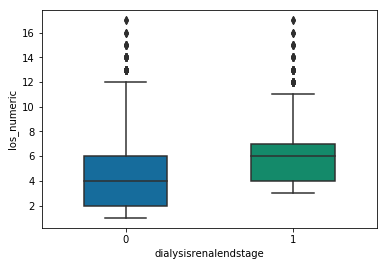

5 asthma


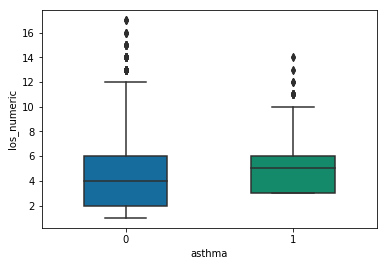

6 irondef


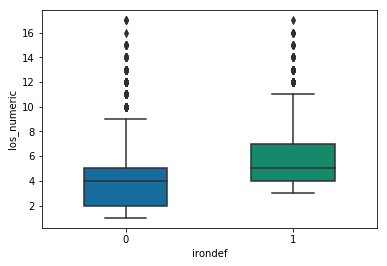

7 pneum


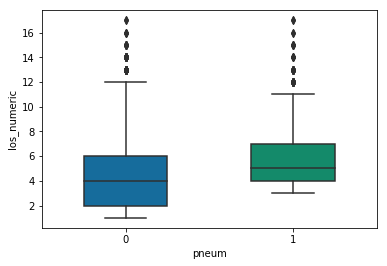

8 substancedependence


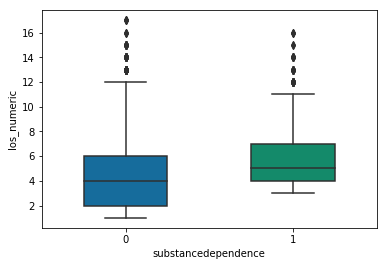

9 psychologicaldisordermajor


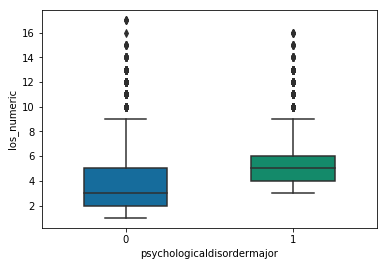

10 depress


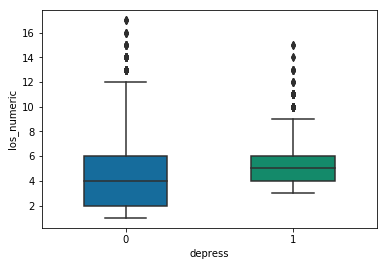

11 psychother


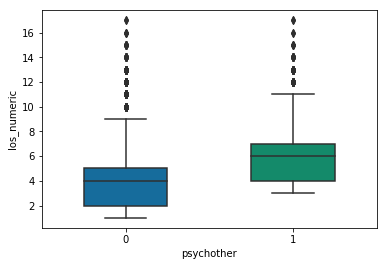

12 fibrosisandother


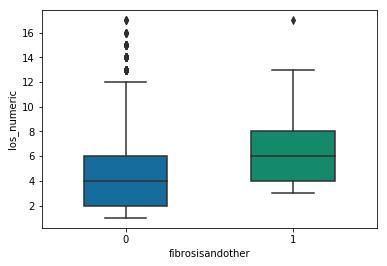

13 malnutrition


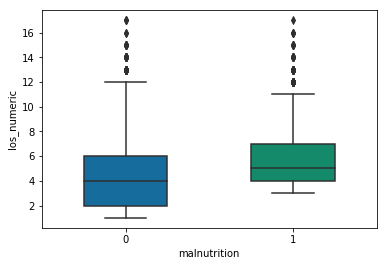

14 hemo


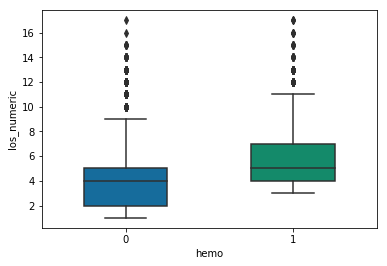

15 hematocrit


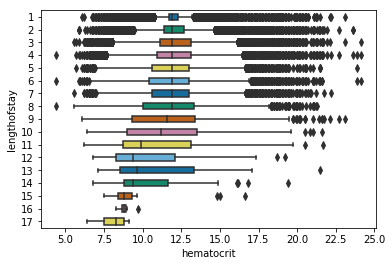

16 neutrophils


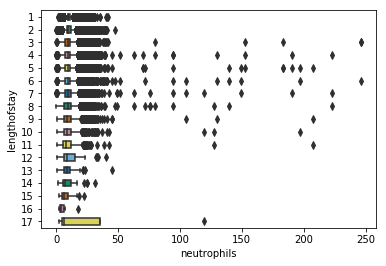

17 sodium


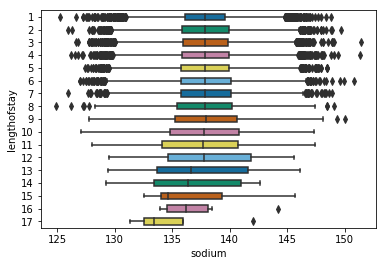

18 glucose


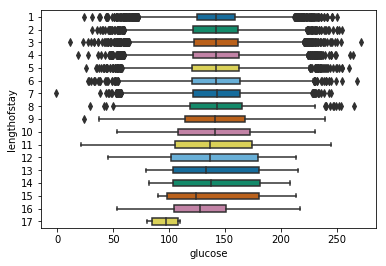

19 bloodureanitro


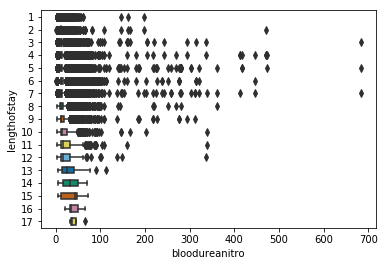

20 creatinine


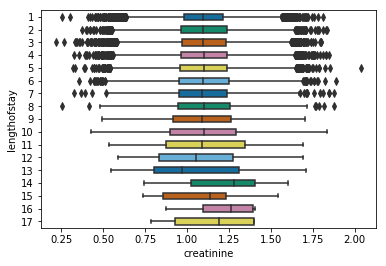

21 bmi


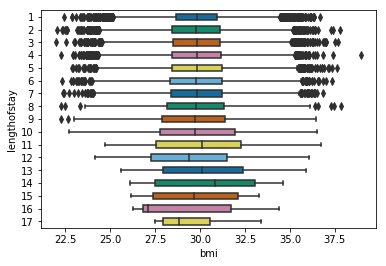

22 pulse


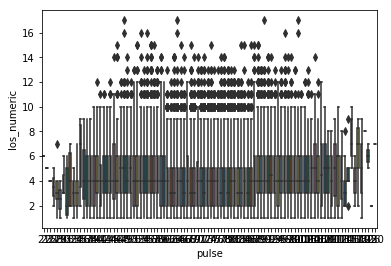

23 respiration


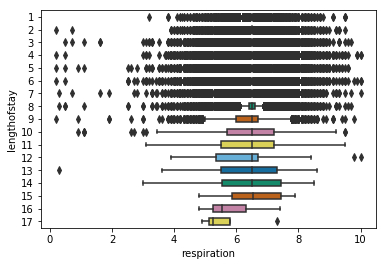

24 secondarydiagnosisnonicd9


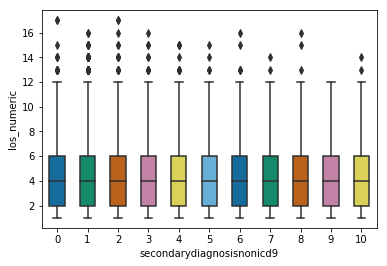

25 discharged
26 facid
27 lengthofstay
28 Capacity


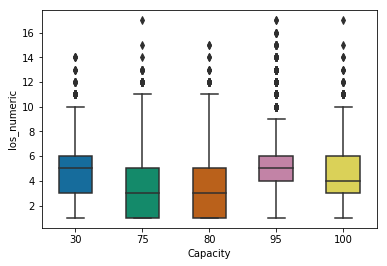

29 Name


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def snsplot(col,df):
    if df[col].dtype=='float64':
        bplot = sns.boxplot(y='lengthofstay', x=col, 
                         data=df, 
                         width=0.5,
                         palette="colorblind")
    else:
        bplot = sns.boxplot(y='los_numeric', x=col, 
                 data=df, 
                 width=0.5,
                 palette="colorblind")
    return bplot

for i in range(len(df13cols)):
    print(i,df13cols[i])
    if df13[df13cols[i]].dtype==object:
        pass
    elif df13cols[i]!='lengthofstay' and df13cols[i]!='eid':
        plt.figure(i)
        plot=snsplot(df13cols[i],df13)
              

        plt.show(plot)


In [7]:
## check classes balance
df13['vdate']=pd.to_datetime(df13['vdate'])
df13['daysofweek_admit']=df13['vdate'].dt.weekday_name
print(df13.dtypes)
df13.head()

eid                                    int64
vdate                         datetime64[ns]
rcount                                 int64
gender                                 int64
dialysisrenalendstage                  int64
asthma                                 int64
irondef                                int64
pneum                                  int64
substancedependence                    int64
psychologicaldisordermajor             int64
depress                                int64
psychother                             int64
fibrosisandother                       int64
malnutrition                           int64
hemo                                   int64
hematocrit                           float64
neutrophils                          float64
sodium                               float64
glucose                              float64
bloodureanitro                       float64
creatinine                           float64
bmi                                  float64
pulse     

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,Capacity,Name,los_numeric,daysofweek_admit
0,1,2012-08-29,0,0,0,0,0,0,0,0,...,96,6.5,4,9/1/2012,B,3,80,4,3,Wednesday
1,3,2012-09-22,1,0,0,0,0,0,0,0,...,64,6.5,2,9/25/2012,B,3,80,4,3,Saturday
2,6,2012-11-27,3,1,0,0,0,0,0,0,...,83,6.1,1,12/3/2012,B,6,80,4,6,Tuesday
3,11,2012-05-11,0,0,0,0,0,0,0,0,...,73,6.5,1,5/12/2012,B,1,80,4,1,Friday
4,17,2012-12-10,3,0,0,0,0,0,0,0,...,66,5.5,0,12/16/2012,B,6,80,4,6,Monday


In [8]:
## encode string columns
from sklearn.preprocessing import LabelEncoder

le_rcount=LabelEncoder()
df13['rcount']=le_rcount.fit_transform(df13['rcount'])
le_gender=LabelEncoder()
df13['gender']=le_gender.fit_transform(df13['gender'])
le_facility=LabelEncoder()
df13['Name']=le_facility.fit_transform(df13['Name'])

le_daysofweekadmit=LabelEncoder()
df13['daysofweek_admit']=le_daysofweekadmit.fit_transform(df13['daysofweek_admit'])
print(df13.dtypes)
df13.head()

eid                                    int64
vdate                         datetime64[ns]
rcount                                 int64
gender                                 int64
dialysisrenalendstage                  int64
asthma                                 int64
irondef                                int64
pneum                                  int64
substancedependence                    int64
psychologicaldisordermajor             int64
depress                                int64
psychother                             int64
fibrosisandother                       int64
malnutrition                           int64
hemo                                   int64
hematocrit                           float64
neutrophils                          float64
sodium                               float64
glucose                              float64
bloodureanitro                       float64
creatinine                           float64
bmi                                  float64
pulse     

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,Capacity,Name,los_numeric,daysofweek_admit
0,1,2012-08-29,0,0,0,0,0,0,0,0,...,96,6.5,4,9/1/2012,B,3,80,4,3,6
1,3,2012-09-22,1,0,0,0,0,0,0,0,...,64,6.5,2,9/25/2012,B,3,80,4,3,2
2,6,2012-11-27,3,1,0,0,0,0,0,0,...,83,6.1,1,12/3/2012,B,6,80,4,6,5
3,11,2012-05-11,0,0,0,0,0,0,0,0,...,73,6.5,1,5/12/2012,B,1,80,4,1,0
4,17,2012-12-10,3,0,0,0,0,0,0,0,...,66,5.5,0,12/16/2012,B,6,80,4,6,1


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


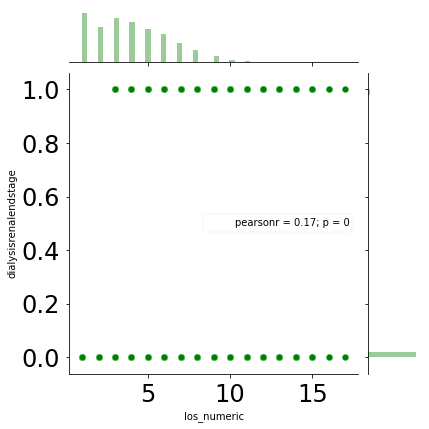

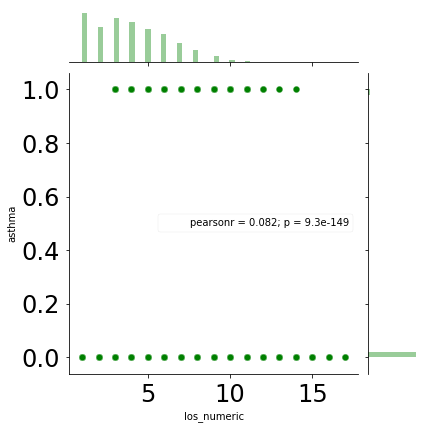

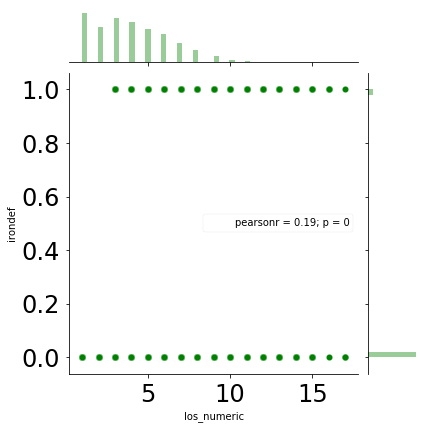

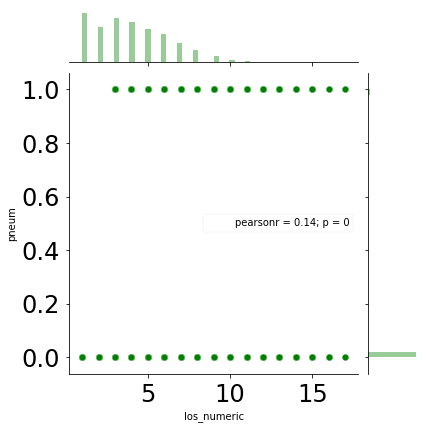

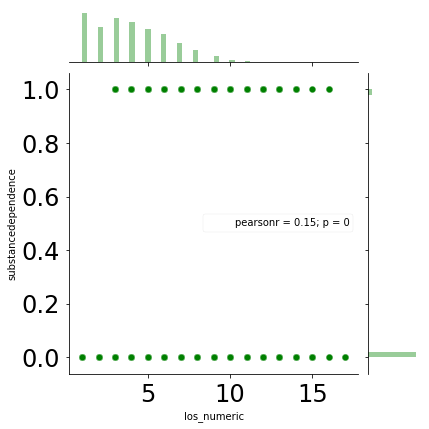

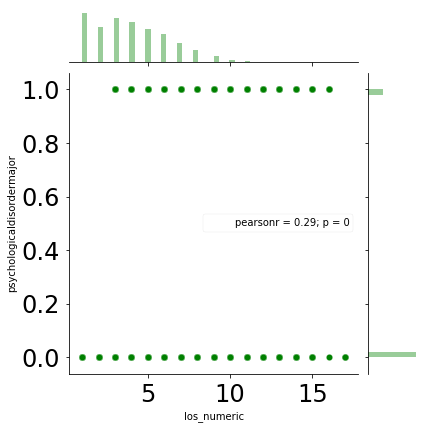

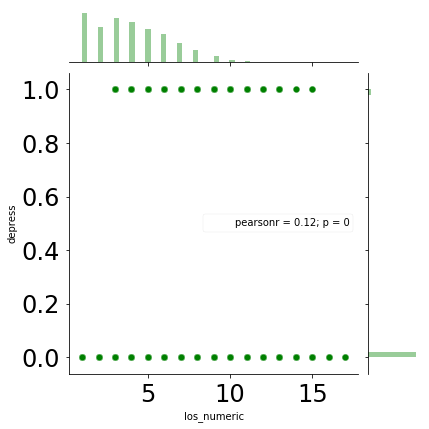

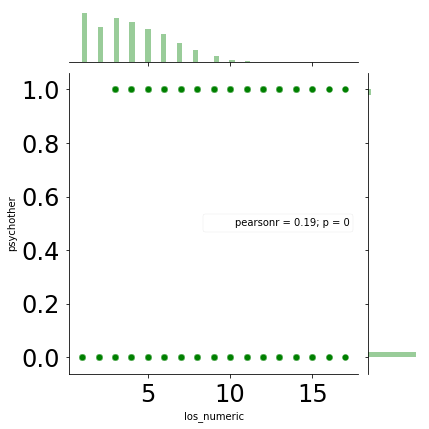

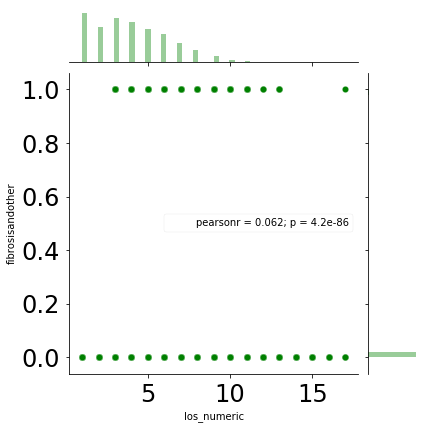

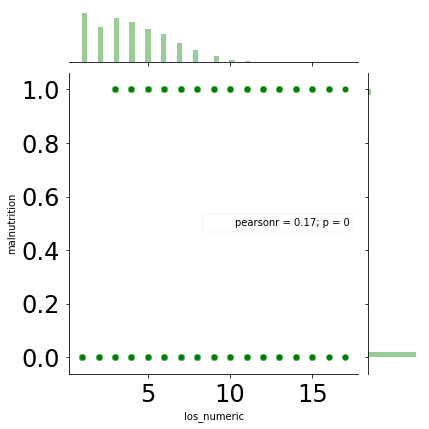

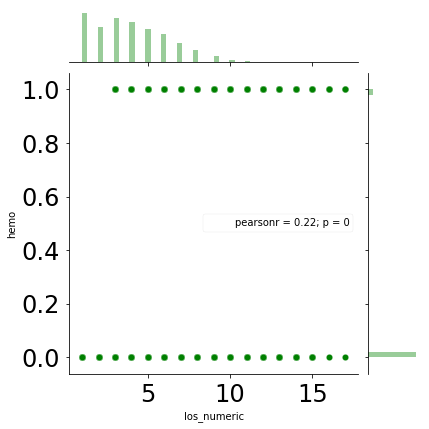

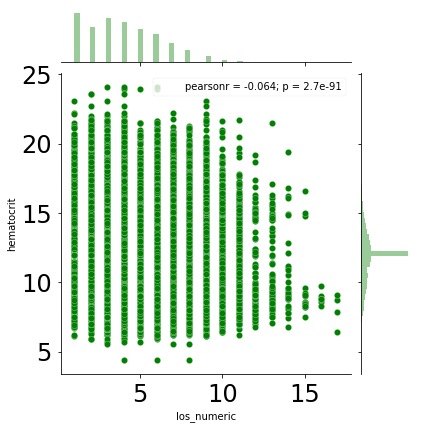

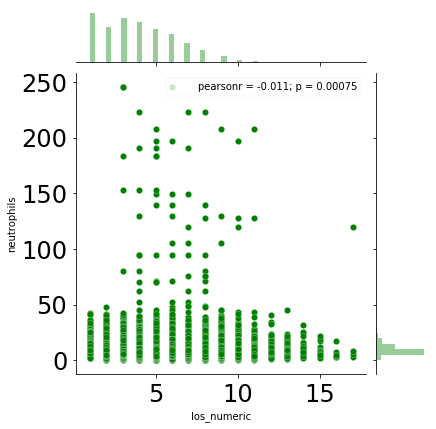

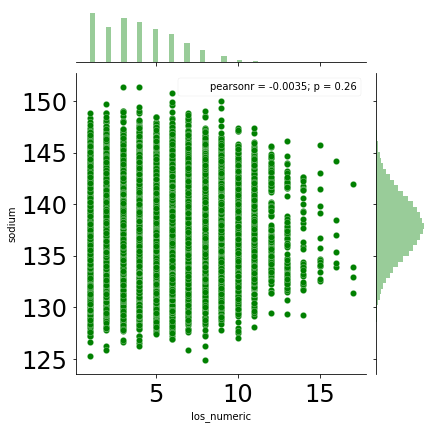

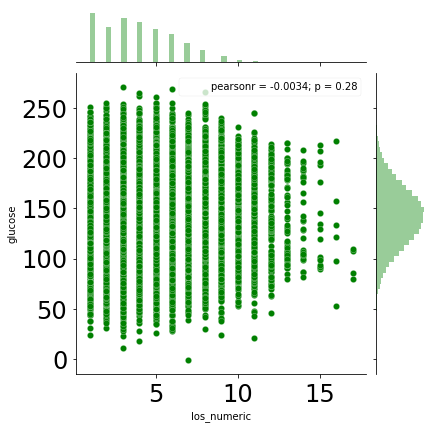

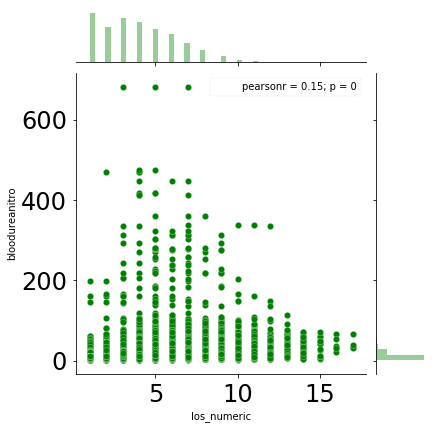

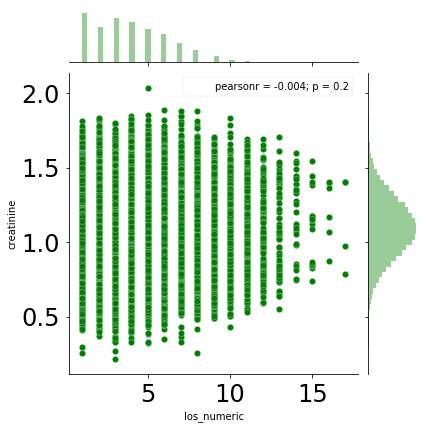

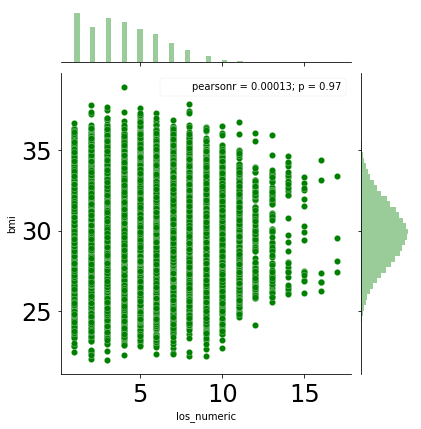

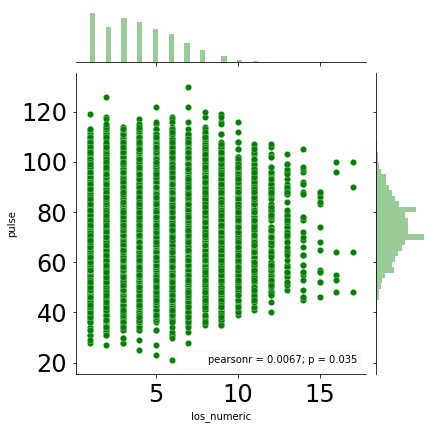

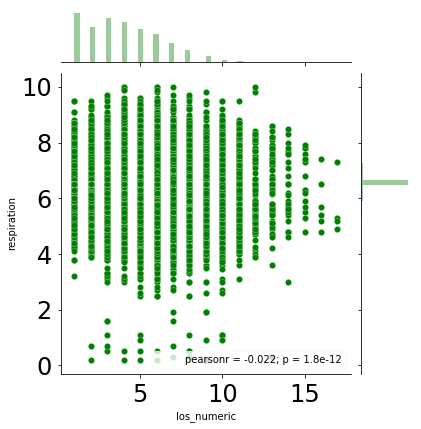

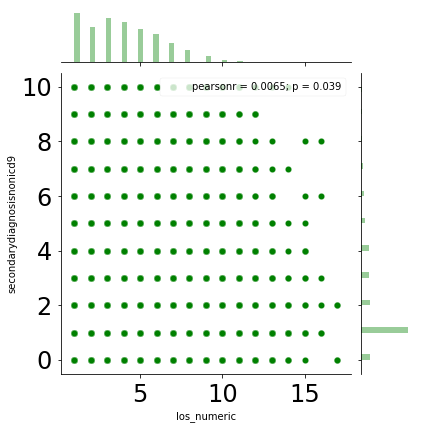

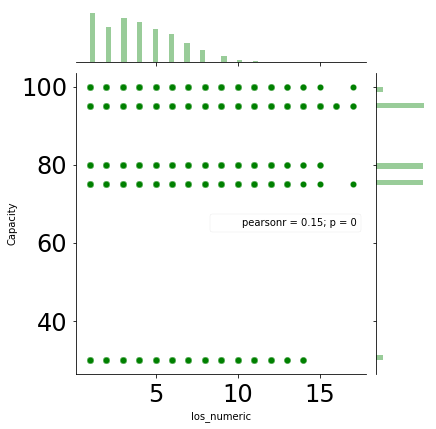

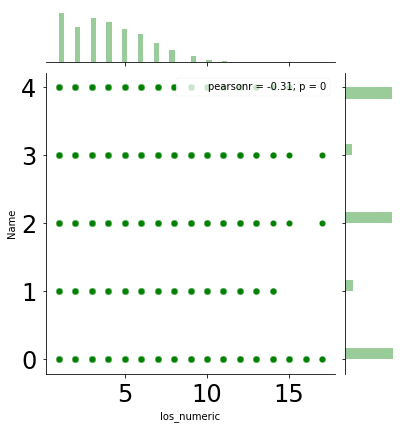

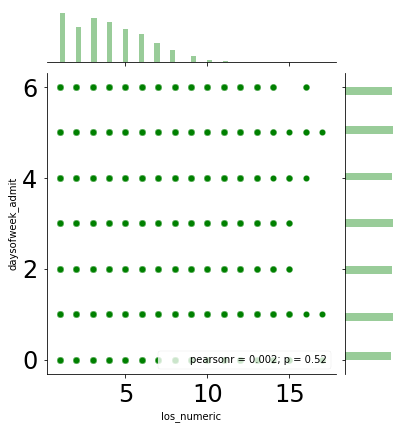

In [24]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
# Set context to `"paper"`
sns.set_context("paper", font_scale=3, rc={"font.size":8,"axes.labelsize":10})
for i in range(len(cols)):
    if cols[i]!='los_numeric':
        plt.figure(i)
        g = sns_plot("los_numeric", cols[i], dat_plot)
        plt.show(g)

In [9]:
dat=df13[['eid',
 'rcount',
 'gender',
 'dialysisrenalendstage',
 'asthma',
 'irondef',
 'pneum',
 'substancedependence',
 'psychologicaldisordermajor',
 'depress',
 'psychother',
 'fibrosisandother',
 'malnutrition',
 'hemo',
 'hematocrit',
 'neutrophils',
 'sodium',
 'glucose',
 'bloodureanitro',
 'creatinine',
 'bmi',
 'pulse',
 'respiration',
 'secondarydiagnosisnonicd9',
 'Capacity',
 'Name',
 'daysofweek_admit',
    'los_numeric']]
dat.iloc[:,1:].dtypes



rcount                          int64
gender                          int64
dialysisrenalendstage           int64
asthma                          int64
irondef                         int64
pneum                           int64
substancedependence             int64
psychologicaldisordermajor      int64
depress                         int64
psychother                      int64
fibrosisandother                int64
malnutrition                    int64
hemo                            int64
hematocrit                    float64
neutrophils                   float64
sodium                        float64
glucose                       float64
bloodureanitro                float64
creatinine                    float64
bmi                           float64
pulse                           int64
respiration                   float64
secondarydiagnosisnonicd9       int64
Capacity                        int64
Name                            int64
daysofweek_admit                int64
los_numeric 

In [10]:
X=dat.iloc[:,1:-1].values
y=dat.iloc[:,-1].values
X.shape,y.shape

((100000, 26), (100000,))

In [59]:
import numpy as np
np.unique(y, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 array([17979, 12825, 16068, 14822, 12116, 10362,  7263,  4652,  2184,
         1000,   460,   137,    75,    31,    16,     6,     4]))

In [11]:
import azureml.core

print("SDK Version:", azureml.core.VERSION)

SDK Version: 0.1.65


In [ ]:
################ use azure automl #########################

In [38]:
#!pip install azureml-sdk[automl]

    100% |████████████████████████████████| 122kB 4.4MB/s ta 0:00:01
    100% |████████████████████████████████| 1.1MB 11.0MB/s ta 0:00:01
    100% |████████████████████████████████| 8.7MB 3.9MB/s eta 0:00:01


  Running setup.py bdist_wheel for JsonForm ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/e8/74/51/42c2d41c02bdc6f0e604476b7e4293b8c98d0bcbfa1dff78c8
  Running setup.py bdist_wheel for JsonSir ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/ee/30/5c/3a3b5e1386c8db9a3be5f5c3933644ae0533c1351c6a8eb4b5
Successfully built JsonForm JsonSir
  Found existing installation: pandas 0.19.2
    Uninstalling pandas-0.19.2:
      Successfully uninstalled pandas-0.19.2
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
import logging
import os
import random

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import pandas as pd
from sklearn import datasets

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.train.automl import AutoMLConfig
azureml.core.
from azureml.train.automl.run import AutoMLRun

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


ImportError: No module named 'azureml.train.automl'

In [13]:
from azureml.core import Experiment, Run, Workspace
import azureml.core

# Check core SDK version number
print("SDK version:", azureml.core.VERSION)
ws = Workspace.from_config()
print('Workspace name: ' + ws.name, 
      'Azure region: ' + ws.location, 
      'Resource group: ' + ws.resource_group, sep='\n')

SDK version: 0.1.65
Found the config file in: /home/nbuser/library/config.json
Workspace name: zenoaz
Azure region: westeurope
Resource group: aznotebook


In [14]:
ws = Workspace.from_config()
# project folder to save your local files
project_folder = '.'
# choose a name for the run history container in the workspace
experiment_name = 'automl'
experiment = Experiment(ws, experiment_name)
import os

output = {}
output['SDK version'] = azureml.core.VERSION
output['Subscription ID'] = ws.subscription_id
output['Workspace'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Project Directory'] = project_folder
output['Experiment Name'] = experiment.name
pd.set_option('display.max_colwidth', -1)
#pd.DataFrame(data=output, index=['']).T

Found the config file in: /home/nbuser/library/config.json


In [15]:
from azureml.telemetry import set_diagnostics_collection
set_diagnostics_collection(send_diagnostics=True)

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
indices=dat.index
X_train, X_test, y_train, y_test, idx_train,idx_test = train_test_split(X, y,indices, test_size = 0.2, random_state = 0)
X_dat=pd.DataFrame(X_test,index=idx_test,columns=[[ 'rcount',
 'gender',
 'dialysisrenalendstage',
 'asthma',
 'irondef',
 'pneum',
 'substancedependence',
 'psychologicaldisordermajor',
 'depress',
 'psychother',
 'fibrosisandother',
 'malnutrition',
 'hemo',
 'hematocrit',
 'neutrophils',
 'sodium',
 'glucose',
 'bloodureanitro',
 'creatinine',
 'bmi',
 'pulse',
 'respiration',
 'secondarydiagnosisnonicd9',
 'Capacity',
 'Name',
 'daysofweek_admit']])
X_dat['Actual_Los']=y_test
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, len(idx_train),len(idx_test)

((80000, 26), (80000,), (20000, 26), (20000,), 80000, 20000)

In [17]:
automl_config = AutoMLConfig(task='regression',
                             max_time_sec = 600,
                             iterations = 10,
                             primary_metric = 'normalized_root_mean_squared_error', 
                             n_cross_validations = 10,
                             debug_log = 'automl.log',
                             verbosity = logging.INFO,
                             compute_target = 'local',
                             X = X_train, 
                             y = y_train,
                             path=project_folder)

In [64]:
### solve pandas error :AttributeError: module 'pandas.api.types' has no attribute 'infer_dtype'
#!python -m pip install --upgrade pip
#!python -m pip install --upgrade pandas==0.21.1

    100% |████████████████████████████████| 25.7MB 1.9MB/s eta 0:00:01
azureml-train-automl 0.1.65 has requirement pandas>=0.22.0, but you'll have pandas 0.21.1 which is incompatible.
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

local_run = experiment.submit(automl_config, show_output=True)

In [48]:
## fitting multiple machine learning regression models 
import timeit

start = timeit.default_timer()

#### decision trees 
from sklearn.tree import DecisionTreeRegressor
name='DecisionTree_reg'
run.tag("Description","multi Regressor")
model = DecisionTreeRegressor(criterion='mse', splitter='best',  min_samples_split=10, min_samples_leaf=1,random_state = 0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
X_dat[name]=y_pred
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error for {} is'.format(name),mse)
run.log('{} mse'.format(name), mse)

joblib.dump(value=model, filename='{}_model.pkl'.format(name))
run.upload_file(name='outputs/'+'{}_model.pkl'.format(name), path_or_stream='./{}_model.pkl'.format(name))
#check time took to compute
stop = timeit.default_timer()
run.log('{} time'.format(name), stop-start)
print('Time to compute {}: '.format(name), stop - start)  

#### Logisitic regression
start = timeit.default_timer()
from sklearn.linear_model import LogisticRegression
name='Logistic_reg'
run.tag("Description","{} Regressor".format(name))
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
X_dat[name]=y_pred
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error for {} is'.format(name),mse)
run.log('{} mse'.format(name), mse)
joblib.dump(value=model, filename='{}_model.pkl'.format(name))
run.upload_file(name='outputs/'+'{}_model.pkl'.format(name), path_or_stream='./{}_model.pkl'.format(name))
#check time took to compute
stop = timeit.default_timer()
run.log('{} time'.format(name), stop-start)
print('Time to compute {}: '.format(name), stop - start)  

#### RandomForest regressor
start = timeit.default_timer()
from sklearn.ensemble import RandomForestRegressor
name='RandomForest_reg'
run.tag("Description","{} Regressor".format(name))
model = RandomForestRegressor(n_estimators = 3, random_state = 0) # n_estimator is the # of trees built
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
X_dat[name]=y_pred
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error for {} is'.format(name),mse)
run.log('{} mse'.format(name), mse)

joblib.dump(value=model, filename='{}_model.pkl'.format(name))
run.upload_file(name='outputs/'+'{}_model.pkl'.format(name), path_or_stream='./{}_model.pkl'.format(name))
#check time took to compute
stop = timeit.default_timer()
run.log('{} time'.format(name), stop-start)
print('Time to compute {}: '.format(name), stop - start)  

#### Support Vector Regressor
"""
start = timeit.default_timer()
from sklearn.svm import SVR
#SVR need X to be transformed first so run through the StandardScaler first
model = SVR(kernel = 'rbf') # there are many kernals such as sigmoid, precomputed, poly, linear...etc
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
X_dat['svr_pred']=y_pred
stop = timeit.default_timer()
print('Time to compute Support Vector Machine Regressor: ', stop - start)  
"""
### Poly regression
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression

# Fitting Polynomial Regression to the dataset
start = timeit.default_timer()
from sklearn.preprocessing import PolynomialFeatures
name='Poly_reg'
run.tag("Description","{} Regressor".format(name))
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train) # we need to both fit and transform variable X
poly_reg.fit(X_poly, y_train)
y_pred=poly_reg.fit_transform(X_test)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
X_dat[name]=y_pred
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error for {} is'.format(name),mse)
run.log('{} mse'.format(name), mse)

joblib.dump(value=lin_reg_2, filename='{}_model.pkl'.format(name))
run.upload_file(name='outputs/'+'{}_model.pkl'.format(name), path_or_stream='./{}_model.pkl'.format(name))
#check time took to compute
stop = timeit.default_timer()
run.log('{} time'.format(name), stop-start)
print('Time to compute {}: '.format(name), stop - start)  


#### rigit regressor
from sklearn.linear_model import Ridge
name='Ridge_reg'
run.tag("Description","{} Regressor".format(name))
start = timeit.default_timer()
reg = Ridge(alpha = 0.03)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
X_dat[name]=y_pred
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error for {} is'.format(name),mse)
run.log('{} mse'.format(name), mse)

joblib.dump(value=model, filename='{}_model.pkl'.format(name))
run.upload_file(name='outputs/'+'{}_model.pkl'.format(name), path_or_stream='./{}_model.pkl'.format(name))
#check time took to compute
stop = timeit.default_timer()
run.log('{} time'.format(name), stop-start)
print('Time to compute {}: '.format(name), stop - start)  
X_dat.to_csv('LenthOfStay_Xtest_predictions.csv',index=True)
run.complete()
X_dat.head()


Mean Squared Error for DecisionTree_reg is 0.7188560647282062
Time to compute DecisionTree_reg:  7.090159399987897
Mean Squared Error for Logistic_reg is 2.2763
Time to compute Logistic_reg:  19.136547100002645


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Mean Squared Error for RandomForest_reg is 0.6084944444444443
Time to compute RandomForest_reg:  10.23831380000047
Mean Squared Error for Poly_reg is 0.742817509407131
Time to compute Poly_reg:  16.74692750000395
Mean Squared Error for Ridge_reg is 1.3659944772476529
Time to compute Ridge_reg:  6.553116299997782


,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,secondarydiagnosisnonicd9,Capacity,Name,daysofweek_admit,Actual_Los,DecisionTree_reg,Logistic_reg,RandomForest_reg,Poly_reg,Ridge_reg
3582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,80.0,4.0,6.0,1,1.000000,1,1.0,1.175476,1.754524
60498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,95.0,0.0,5.0,3,3.000000,3,3.0,3.707977,4.476852
53227,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,75.0,2.0,4.0,4,5.285714,2,5.0,3.899353,4.444519
21333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,80.0,4.0,0.0,1,1.000000,1,1.0,1.319824,1.778439
3885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,80.0,4.0,2.0,1,1.000000,1,1.0,1.331146,1.831162


In [50]:
!pip install xgboost
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict

    100% |████████████████████████████████| 15.8MB 2.4MB/s eta 0:00:01
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [63]:
name='xgboost3'
run.tag("Description","{} Regressor".format(name))
start = timeit.default_timer()
model = xgboost.XGBRegressor(colsample_bytree=0.5,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=1000,
                 min_child_weight=1.5,
                 n_estimators=20,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
#OrderedDict(sorted(model.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))
X_dat[name]=y_pred
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error for {} is'.format(name),mse)
run.log('{} mse'.format(name), mse)

joblib.dump(value=model, filename='{}_model.pkl'.format(name))
run.upload_file(name='outputs/'+'{}_model.pkl'.format(name), path_or_stream='./{}_model.pkl'.format(name))
#check time took to compute
stop = timeit.default_timer()
run.log('{} time'.format(name), stop-start)
print('Time to compute {}: '.format(name), stop - start)  

Mean Squared Error for xgboost3 is 1.1975713771671679
Time to compute xgboost3:  20.95478970000113


In [54]:
X_dat.to_csv('LenthOfStay_Xtest_predictions.csv',index=True)
X_dat.columns

Index(['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'Capacity',
       'Name', 'daysofweek_admit', 'Actual_Los', 'DecisionTree_reg',
       'Logistic_reg', 'RandomForest_reg', 'Poly_reg', 'Ridge_reg', 'xgboost'],
      dtype='object')

In [23]:
### check the run history
run

Experiment,Id,Type,Status,Details Page,Docs Page
multi_regressors_2,fa1cca31-4479-4efd-bf62-24f021d3c36d,,Completed,Link to Azure Portal,Link to Documentation


In [87]:
from sklearn.ensemble import AdaBoostRegressor
name='adaboost1_reg'
run.tag("Description","{} Regressor".format(name))
start = timeit.default_timer()

regr_1 = DecisionTreeRegressor(criterion='mse', splitter='best',  min_samples_split=2, min_samples_leaf=1,random_state = 0)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators=15, random_state=0)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_pred = regr_2.predict(X_test)


X_dat[name]=y_pred
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error for {} is'.format(name),mse)
run.log('{} mse'.format(name), mse)

joblib.dump(value=model, filename='{}_model.pkl'.format(name))
run.upload_file(name='outputs/'+'{}_model.pkl'.format(name), path_or_stream='./{}_model.pkl'.format(name))
#check time took to compute
stop = timeit.default_timer()
run.log('{} time'.format(name), stop-start)
print('Time to compute {}: '.format(name), stop - start)  

Mean Squared Error for adaboost1_reg is 0.6717882664240745
Time to compute adaboost1_reg:  23.600594999996247


In [84]:
X_dat.to_csv('LenthOfStay_Xtest_predictions.csv',index=True)
X_dat.columns

Index(['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'Capacity',
       'Name', 'daysofweek_admit', 'Actual_Los', 'DecisionTree_reg',
       'Logistic_reg', 'RandomForest_reg', 'Poly_reg', 'Ridge_reg', 'xgboost',
       'xgboost1', 'xgboost2', 'xgboost3', 'adaboost_reg'],
      dtype='object')

In [91]:
# clear the loss function
X_dat=X_dat.filter(regex=r'^((?!_loss).)*$')
X_dat.columns



Index(['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'Capacity',
       'Name', 'daysofweek_admit', 'Actual_Los', 'DecisionTree_reg',
       'Logistic_reg', 'RandomForest_reg', 'Poly_reg', 'Ridge_reg', 'xgboost',
       'xgboost1', 'xgboost2', 'xgboost3', 'adaboost_reg', 'adaboost1_reg'],
      dtype='object')

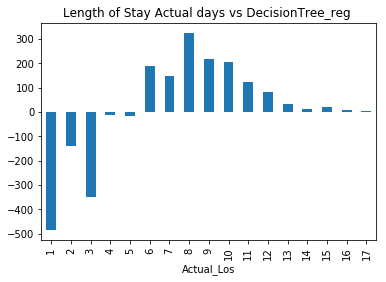

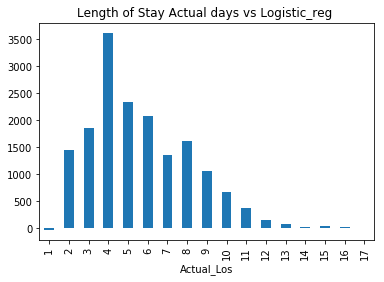

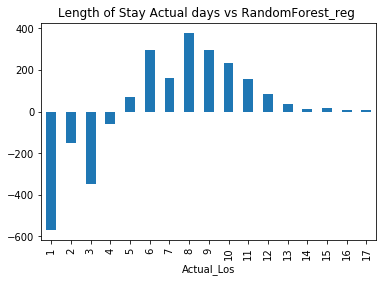

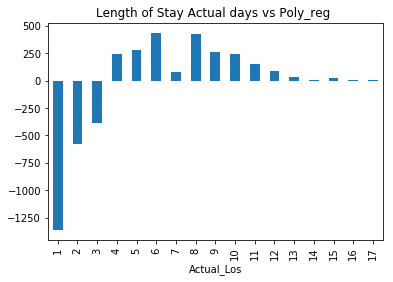

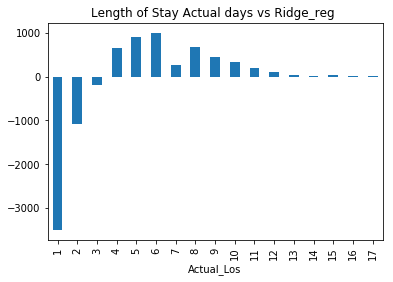

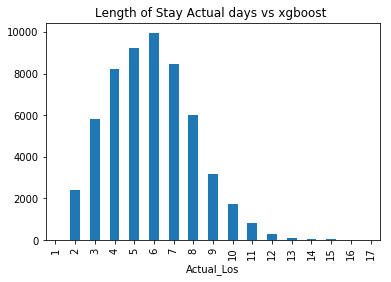

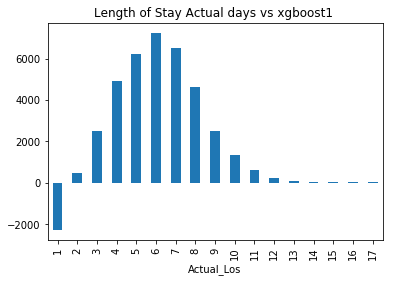

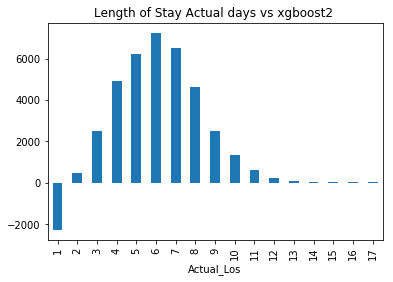

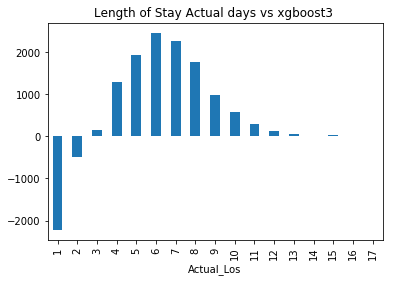

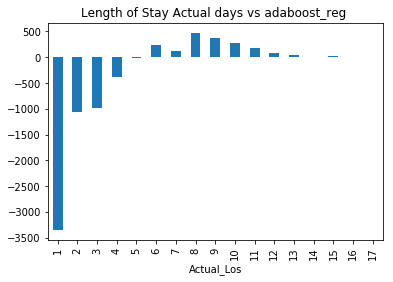

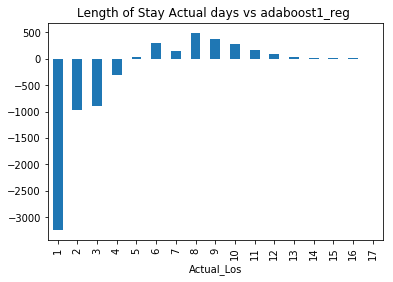

In [92]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#X_dat=pd.read_csv('LenthOfStay_Xtest_predictions.csv')
def compare(label_col, pred_col, df):
    
    df['{}_loss'.format(pred_col)]=df[label_col]-df[pred_col]
    df.groupby([label_col])['{}_loss'.format(pred_col)].sum().plot(kind='bar')
    plt.title("Length of Stay Actual days vs {} ".format(pred_col))
    plt.show()
    df=df.filter(regex=r'^((?!_loss).)*$')
cols_to_plot=list(X_dat.columns)[-12:]

for col in cols_to_plot[1:]:
    compare('Actual_Los',col,X_dat)

In [31]:
model_history={}
for item in experiment.get_runs():
    tags=item.get_tags()
    metrics=item.get_metrics()
    
        

{'Description': 'Ridge_reg Regressor'} {'Ridge_reg mse': 1.3659944772476529, 'Poly_reg time': 8.530775799998082, 'RandomForest_reg time': 19.67865819999861, 'DecisionTree_reg mse': 0.7188560647282062, 'RandomForest_reg mse': 0.6084944444444443, 'Poly_reg mse': 0.7434465979482978, 'Logistic_reg mse': 2.2763, 'Ridge_reg time': 9.80600389999745, 'DecisionTree_reg time': 10.207155199997942, 'Logistic_reg time': 27.97002070000599}
{'Description': 'Ridge_reg Regressor'} {'Ridge_reg mse': 1.3659944772476529, 'Poly_reg time': 6.872558500006562, 'RandomForest_reg time': 11.047483300004387, 'DecisionTree_reg mse': 0.7188560647282062, 'RandomForest_reg mse': 0.6084944444444443, 'Poly_reg mse': 0.7434465979482978, 'Logistic_reg mse': 2.2763, 'Ridge_reg time': 7.151111999999557, 'DecisionTree_reg time': 6.961515900002269, 'Logistic_reg time': 20.005018500000006}


In [32]:
metric

dict_items([('Ridge_reg mse', 1.3659944772476529), ('Poly_reg time', 6.872558500006562), ('RandomForest_reg time', 11.047483300004387), ('DecisionTree_reg mse', 0.7188560647282062), ('RandomForest_reg mse', 0.6084944444444443), ('Poly_reg mse', 0.7434465979482978), ('Logistic_reg mse', 2.2763), ('Ridge_reg time', 7.151111999999557), ('DecisionTree_reg time', 6.961515900002269), ('Logistic_reg time', 20.005018500000006)])